<a href="https://colab.research.google.com/github/pleabargain/ipynb_notebooks/blob/master/Copy_of_Capturing_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capturing Output with <tt>%%capture</tt>

One of IPython's new cell magics is `%%capture`, which captures stdout/err for a cell,
and discards them or stores them in variables in your namespace.

In [0]:
import sys

By default, it just swallows it up.  This is a simple way to suppress unwanted output.

In [0]:
%%capture
print 'hi, stdout'
print >> sys.stderr, 'hi, stderr'

If you specify a name, then stdout and stderr will be stored in an object in your namespace.

In [0]:
%%capture captured
print 'hi, stdout'
print >> sys.stderr, 'hi, stderr'

In [4]:
captured

Calling the object writes the output to stdout/err as appropriate.

In [5]:
captured()

hi, stdout


hi, stderr


In [6]:
captured.stdout

'hi, stdout\n'

In [7]:
captured.stderr

'hi, stderr\n'

`%%capture` only captures stdout/err, not displaypub, so you can still do plots and use the display protocol inside %%capture

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
%%capture wontshutup

print "setting up X"
x = np.linspace(0,5,1000)
print "step 2: constructing y-data"
y = np.sin(x)
print "step 3: display info about y"
plt.plot(x,y)
print "okay, I'm done now"

setting up X
step 2: constructing y-data
step 3: display info about y
okay, I'm done now


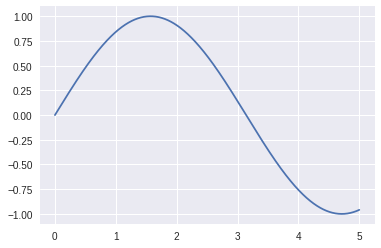

In [10]:
wontshutup()

And you can selectively disable capturing stdout or stderr by passing `--no-stdout/err`.

In [11]:
%%capture cap --no-stderr
print 'hi, stdout'
print >> sys.stderr, "hello, stderr"

hello, stderr


In [12]:
cap.stdout

'hi, stdout\n'

In [13]:
cap.stderr

''